In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.covariance import EmpiricalCovariance



In [4]:
sgcredit_df = pd.read_table("../data/SouthGermanCredit/SouthGermanCredit.asc", header=0, sep=None)

/home/nic/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
sgcredit_df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [6]:
#Change column names from German to English

sgcredit_df = sgcredit_df.rename(columns=({"laufkont" : "status", "laufzeit" : "duration", "moral" : "credit history", "verw" : "purpose", "hoehe" : "amount", 
                    "sparkont" : "savings", "beszeit" : "employment duration", "rate" : "installment rate",
                    "famges" : "personal status sex", "buerge" : "other debtors",
                    "wohnzeit" : "present residence", "verm" : "property",
                    "alter" : "age", "weitkred" : "other installment plans",
                    "wohn" : "housing", "bishkred" : "number credits",
                    "beruf" : "job", "pers" : "people liable", "telef" : "telephone", "gastarb" : "foreign worker",
                    "kredit" : "credit risk"}))

In [7]:
# sns.pairplot(sgcredit_df)

In [8]:
sgcredit_df.sample(15)

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other installment plans,housing,number credits,job,people liable,telephone,foreign worker,credit risk
167,4,24,4,9,4526,1,3,3,3,1,...,1,74,3,2,1,4,2,2,2,1
493,4,24,4,3,2611,1,5,4,4,2,...,1,46,3,2,2,3,2,1,2,1
172,3,12,2,3,1297,1,3,3,4,1,...,1,23,3,1,1,3,2,1,2,1
19,4,11,4,0,7228,1,3,1,3,1,...,2,39,3,2,2,2,2,1,2,1
826,2,48,0,9,3844,2,4,4,3,1,...,4,34,3,3,1,2,1,1,2,0
611,1,12,2,2,2577,1,3,2,1,1,...,3,42,3,2,1,3,2,1,2,1
241,4,60,2,0,10366,1,5,2,3,1,...,2,42,3,2,1,4,2,2,2,1
158,2,48,1,9,6416,1,5,4,2,1,...,4,59,3,1,1,3,2,1,2,0
496,4,6,2,3,2108,1,4,2,4,1,...,1,29,3,1,1,3,2,1,2,1
641,3,42,0,9,6289,1,2,2,1,1,...,2,33,3,2,2,3,2,1,2,1


/home/nic/anaconda3/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:287: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/home/nic/anaconda3/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:287: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'


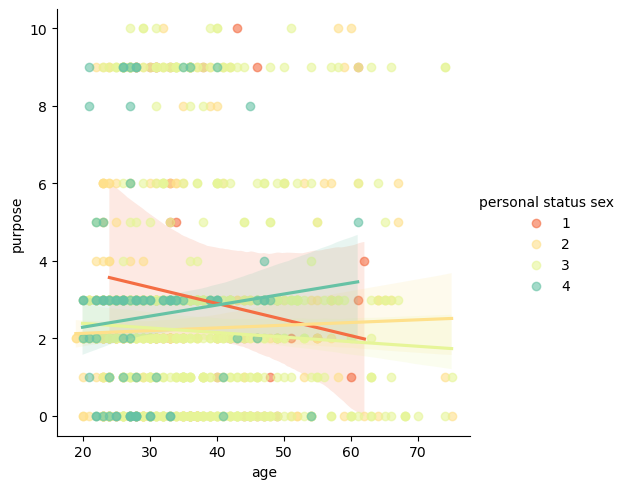

In [66]:
g = sns.lmplot(
    data=sgcredit_df, 
    x="age", y="purpose", 
    hue="personal status sex", 
    palette= "Spectral", 
    scatter_kws={'alpha':0.6}, robust=True)
# g.map_lower(sns.kdeplot, levels=1, color=".2")

In [11]:
# sns.lineplot(
#     data=sgcredit_df,
#     x="age", y="savings", 
#     hue="status", 
#     palette= "Spectral"
#     )

In [91]:

X = sgcredit_df["purpose"].values
y = sgcredit_df["personal status sex"].values
# x_axis = np.linspace(0,1,len(X))

lr_model = EmpiricalCovariance()
lr_model.fit(X.reshape(-1, 1), y)

EmpiricalCovariance()

AttributeError: 'EmpiricalCovariance' object has no attribute 'reshape'

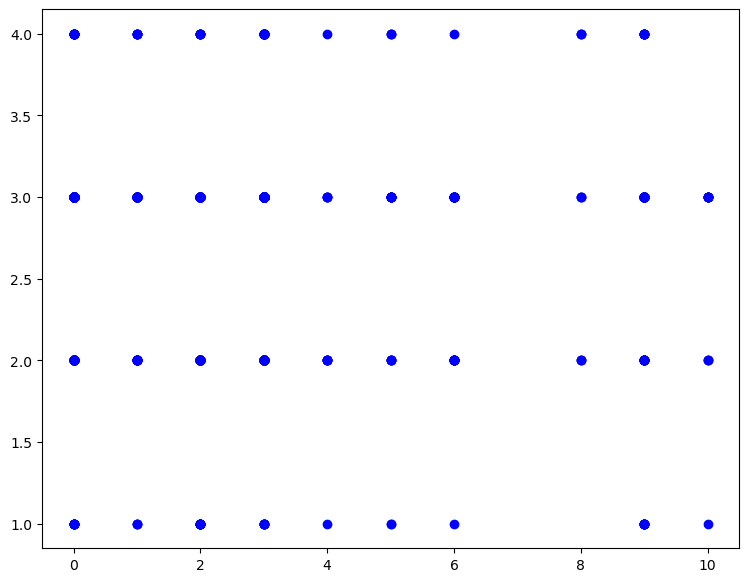

In [94]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter((X.reshape(-1,1)),y, color='blue')
ax.plot((X.reshape(-1,1)), lr_model.reshape(-1,1), color='red')

In [20]:

# sns.residplot(data=sgcredit_df, x="age", y="amount", line_kws=dict(color="r"))

In [83]:
X_q = np.empty((len(sgcredit_df["personal status sex"].values), 2))
X_q[:, 0] = sgcredit_df["personal status sex"].values
X_q[:, 1] = sgcredit_df["personal status sex"].values**2

In [84]:
quadratic_model = LinearRegression()
quadratic_model.fit(X_q, y)

LinearRegression()

No handles with labels found to put in legend.


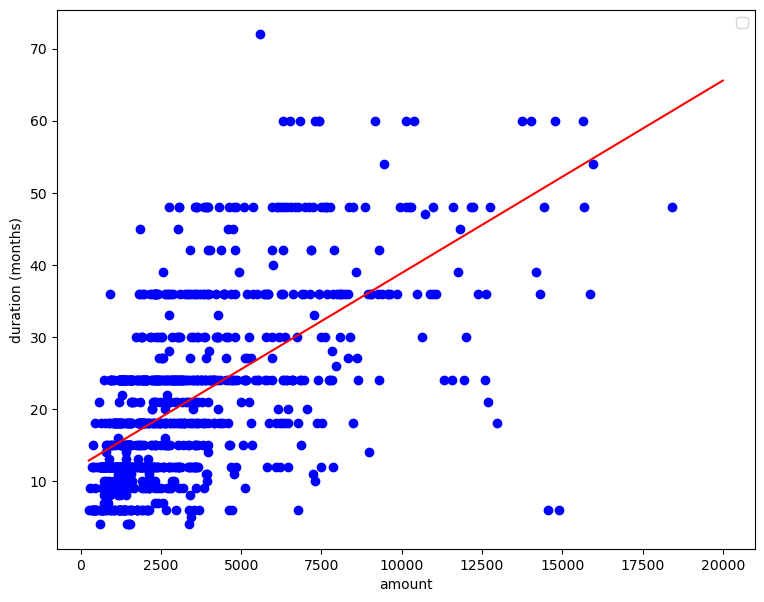

In [72]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(sgcredit_df.amount.values, y, color="blue")
xvals = np.linspace(250, 20000)
ax.plot(xvals,lr_model.predict(
    xvals.reshape(-1, 1)), color="red")
Xfeatures = np.empty((len(xvals), 2))
Xfeatures[:, 0] = xvals
Xfeatures[:, 1] = xvals * xvals
# ax.plot(xvals, quadratic_model.predict(Xfeatures),
#         color="black", label='quadratic')
ax.set_xlabel('amount')
ax.set_ylabel('duration (months)')
ax.legend()

/home/nic/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='purpose', ylabel='personal status sex'>

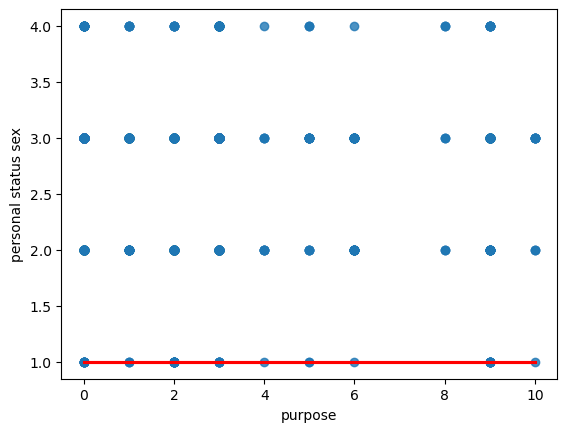

In [87]:
sns.regplot(data=sgcredit_df, y="personal status sex", x="purpose", logistic=True, line_kws=dict(color="r"))

In [90]:
# mean_squared_error(y, lr_model.predict(X.reshape(-1, 1)))

EmpiricalCovariance()

EmpiricalCovariance()

In [34]:
# mean_squared_error(y, quadratic_model.predict(X_q))

1.556098399555266

In [86]:
r2_score(y, lr_model.predict(X.reshape(-1, 1)))

2.452133718300331e-08

In [85]:
r2_score(y, quadratic_model.predict(X_q))

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [71]:
# Fit your model using the training set
reg = KNeighborsRegressor()
reg.fit(X_train.reshape(-1,1), y_train)

# Call predict to get the predicted values for training and test set
train_predicted = reg.predict(X_train.reshape(-1,1))
test_predicted = reg.predict(X_test.reshape(-1,1))

# Calculate RMSE for training and test set
print( 'RMSE for training set ', mean_squared_error(train_predicted, y_train) )
print( 'RMSE for test set ', mean_squared_error(test_predicted, y_test) )

RMSE for training set  70.94181333333333
RMSE for test set  98.38592


In [33]:
# cross_val_score()
# sgcredit_df["age"].values

In [21]:
a = sgcredit_df["age"].values
y = sgcredit_df["status"].values
x_axis = np.linspace(0,1,len(a))

lr_model = LinearRegression()
lr_model.fit(a.reshape(-1, 1), y)

LinearRegression()

In [22]:
X_q = np.empty((len(sgcredit_df.age.values), 2))
X_q[:, 0] = sgcredit_df.age.values
X_q[:, 1] = sgcredit_df.age.values**2

quadratic_model = LinearRegression()
quadratic_model.fit(X_q, y)

LinearRegression()

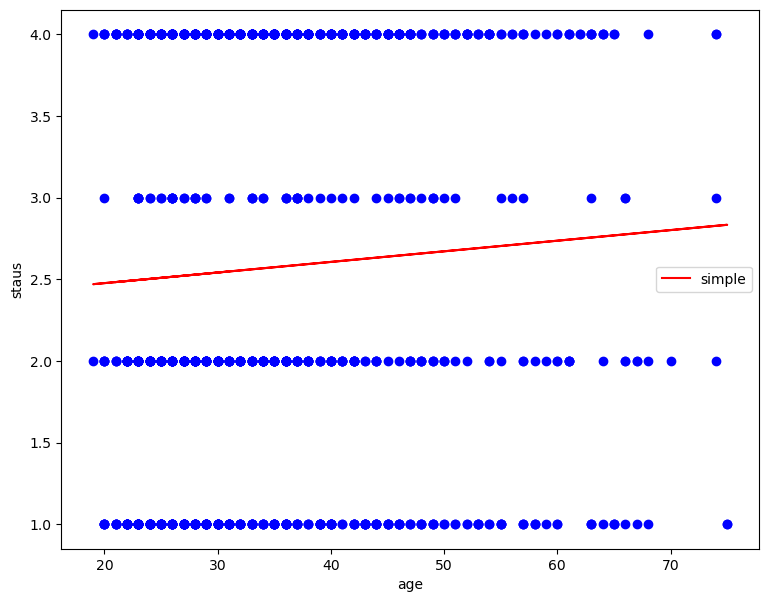

In [24]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter((a.reshape(-1,1)),y, color='blue')
ax.plot((a.reshape(-1,1)),lr_model.predict(a.reshape(-1,1)), color='red', label="simple")

xvals = np.linspace(19, 75)
Xfeatures = np.empty((len(xvals), 2))
Xfeatures[:, 0] = xvals
Xfeatures[:, 1] = xvals * xvals
# ax.plot(xvals, quadratic_model.predict(Xfeatures),
#         color="black", label='quadratic')

ax.set_xlabel('age')
ax.set_ylabel('staus')
ax.legend()

<AxesSubplot:xlabel='age', ylabel='status'>

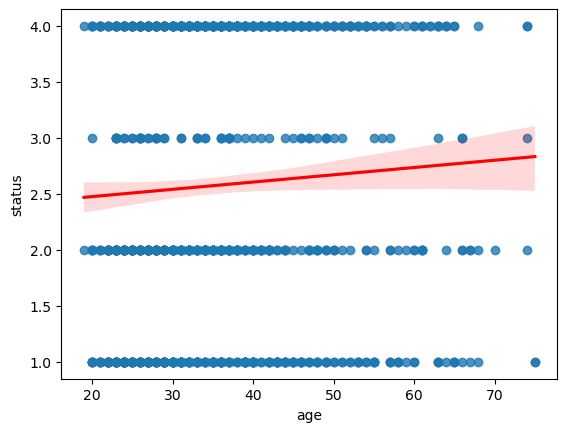

In [32]:
sns.regplot(data=sgcredit_df, x="age", y="status", robust=True, line_kws=dict(color="r"))

In [ ]:
y2 = sgcredit_df["duration"]
X2 = sgcredit_df[["age", "Amount",]]